Visualiser et analyser l’exécution d’un run (une instance)

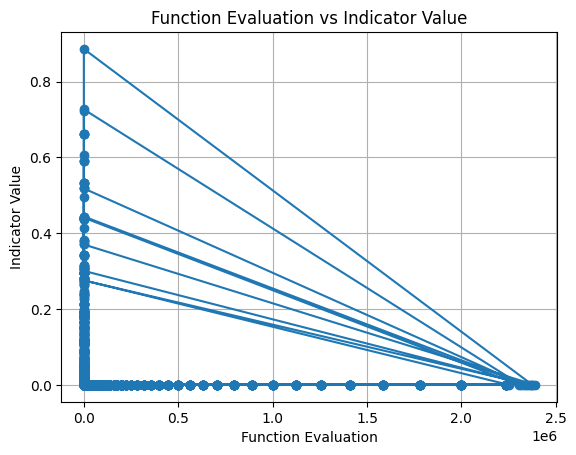

In [4]:

import matplotlib.pyplot as plt

# Read the data from the .dat file
with open('d02_d03_d10/1-separable_1-separable/bbob-biobj_f01_d02_hyp.tdat', 'r') as file:
    lines = file.readlines()

# Initialize lists to store data
function_evaluation = []
indicator_value = []

# Parse the data
for line in lines:
    if line.startswith('%') or line.strip() == '':
        continue
    else:
        data = line.split()
        function_evaluation.append(float(data[0]))
        indicator_value.append(float(data[1]))

# Plot the data
plt.plot(function_evaluation, indicator_value, marker='o', linestyle='-')
plt.xlabel('Function Evaluation')
plt.ylabel('Indicator Value')
plt.title('Function Evaluation vs Indicator Value')
plt.grid(True)
plt.show()


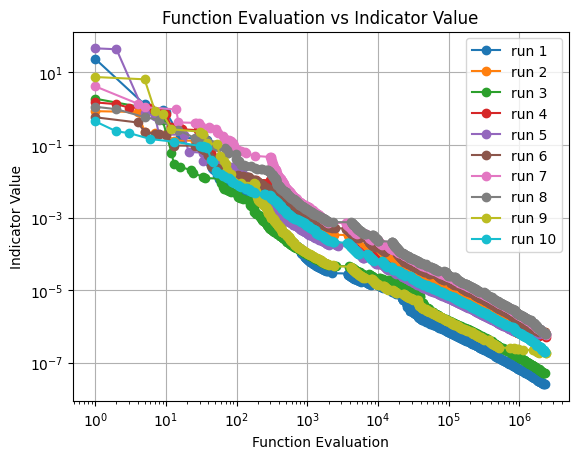

In [5]:
import numpy as np 

# Read the data from the .dat file
with open('d02_d03_d10/1-separable_1-separable/bbob-biobj_f02_d02_hyp.dat', 'r') as file:
    lines = file.readlines()

# Initialize lists to store data
function_evaluation = []
indicator_value = []
inst_run_fct=[]
inst_run_valu=[]

fig1, ax1 = plt.subplots()

# Parse the data
for line in lines:
    if line.startswith('%') or line.strip() == '':
        if(inst_run_fct!=[]):
                function_evaluation.append(inst_run_fct)
                indicator_value.append(inst_run_valu)
        inst_run_fct=[]
        inst_run_valu=[]
        continue
    else:
        data = line.split()
        inst_run_fct.append(float(data[0]))
        inst_run_valu.append(float(data[1]))

function_evaluation.append(inst_run_fct)
indicator_value.append(inst_run_valu)


for i in range(len(function_evaluation)):
     plt.plot(function_evaluation[i], indicator_value[i],marker='o', linestyle='-',label=f'run {i+1}')
# Plot the data
plt.xlabel('Function Evaluation')
plt.xscale('log')
plt.yscale('log')

plt.ylabel('Indicator Value')
plt.title('Function Evaluation vs Indicator Value')
plt.grid(True)
plt.legend()
plt.show()

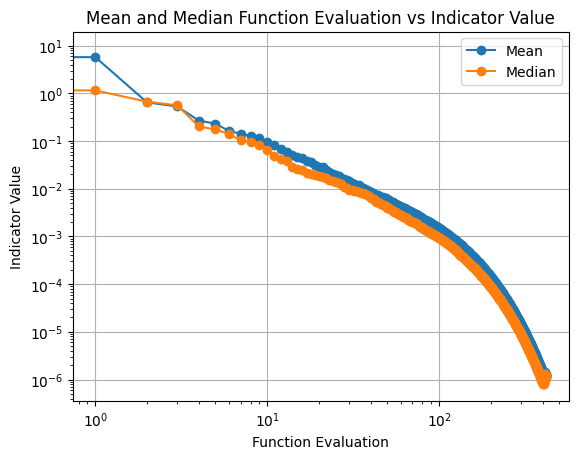

In [6]:
# Calculate the mean for each function evaluation
indicator_value_mean = []
n = len(indicator_value[0])
for i in range(n):
    mean_x = 0
    z = 0
    for e in indicator_value:
        if len(e) > i:  # Vérifiez si l'instance a suffisamment de valeurs
            mean_x = mean_x + e[i]
            z = z + 1
    
    if z != 0:  # Assurez-vous qu'il y a au moins une valeur pour calculer la moyenne
        indicator_value_mean.append(mean_x / z)
    else:
        indicator_value_mean.append(0)  # Si aucune valeur n'est disponible, mettez 0 comme moyenne

# Calculate the median for each function evaluation
indicator_value_median = []
for i in range(n):
    values = []
    for e in indicator_value:
        if len(e) > i:  # Vérifiez si l'instance a suffisamment de valeurs
            values.append(e[i])
    values.sort()
    k = len(values)
    mid = 0
    if k % 2 == 1:  # Nombre impair d'éléments
        mid = values[k // 2]
    else:  # Nombre pair d'éléments
        mid_right = k // 2
        mid_left = mid_right - 1
        mid = (values[mid_left] + values[mid_right]) / 2
    indicator_value_median.append(mid)

indicator_value_var = []
for i in range(n):
    var_x = 0
    z = 0
    for e in indicator_value:
        if len(e) > i:  # Check if the instance has enough values
            var_x += (e[i] - indicator_value_mean[i]) ** 2
            z += 1

    if z != 0:  # Ensure there is at least one value to calculate the variance
        indicator_value_var.append(var_x / z)
    else:
        indicator_value_var.append(0)

# Plot the data
plt.plot([i for i in range(n)], indicator_value_mean, marker='o', linestyle='-', label='Mean')
plt.plot([i for i in range(n)], indicator_value_median, marker='o', linestyle='-', label='Median')

plt.xlabel('Function Evaluation')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Indicator Value')
plt.title('Mean and Median Function Evaluation vs Indicator Value')
plt.grid(True)
plt.legend()
plt.show()

Deuxième étape

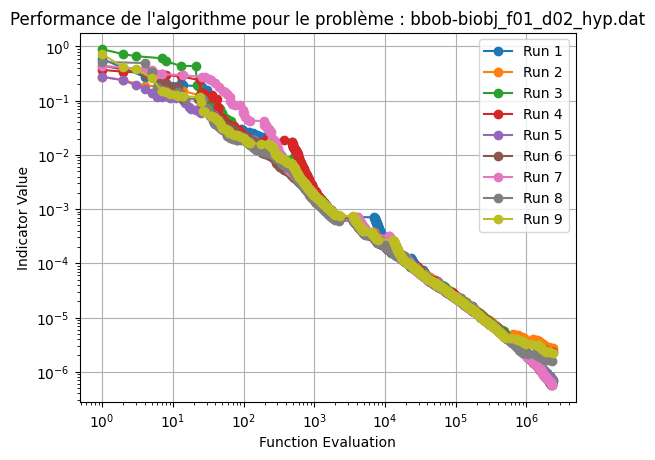

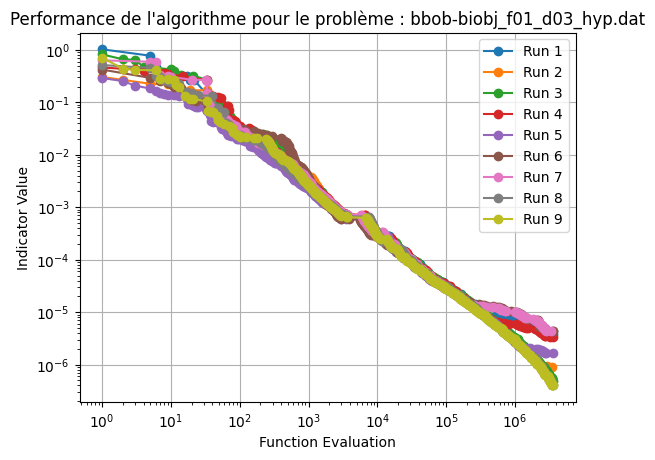

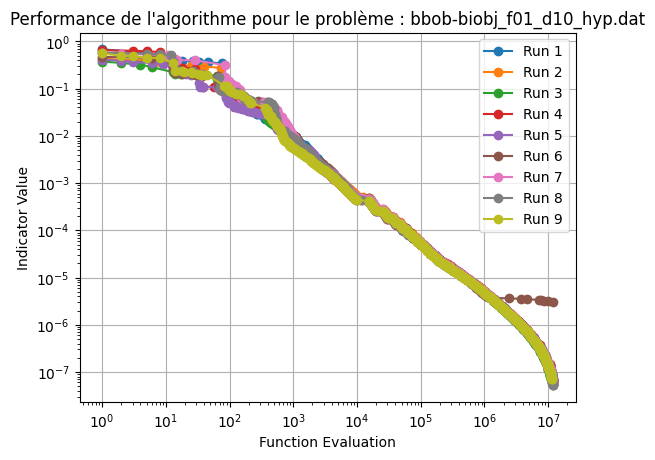

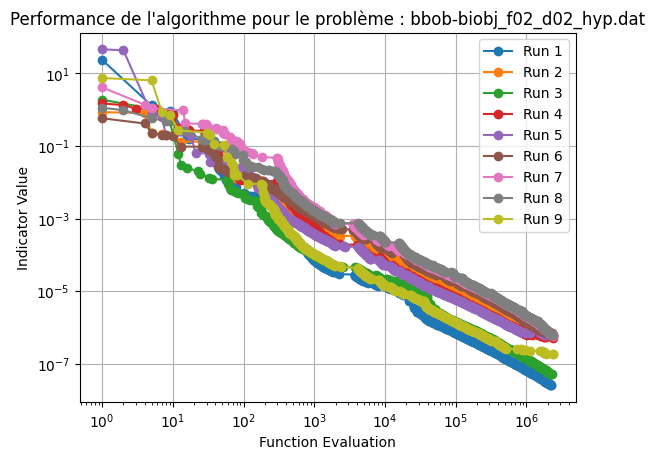

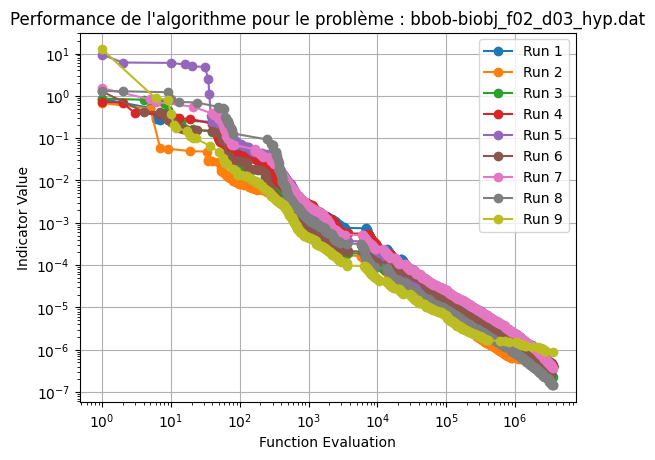

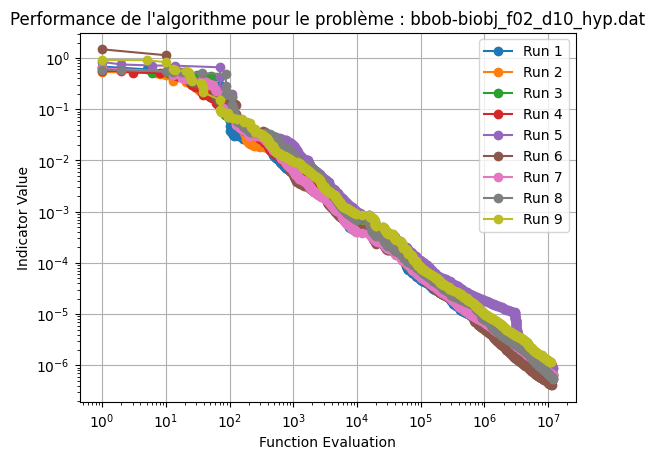

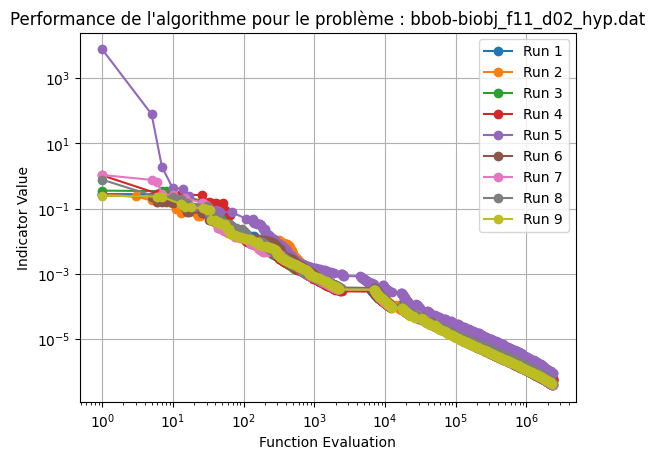

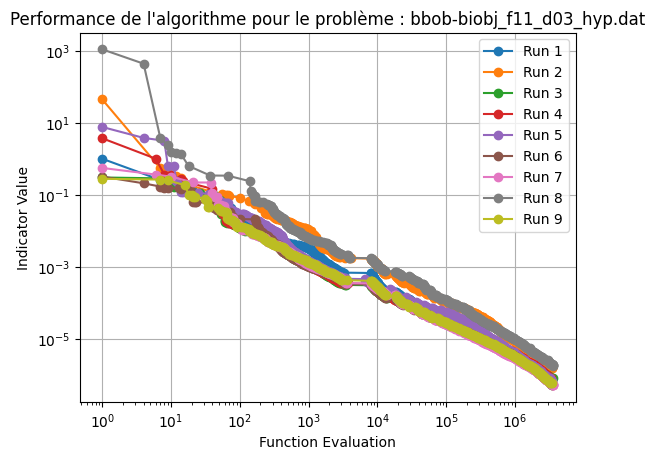

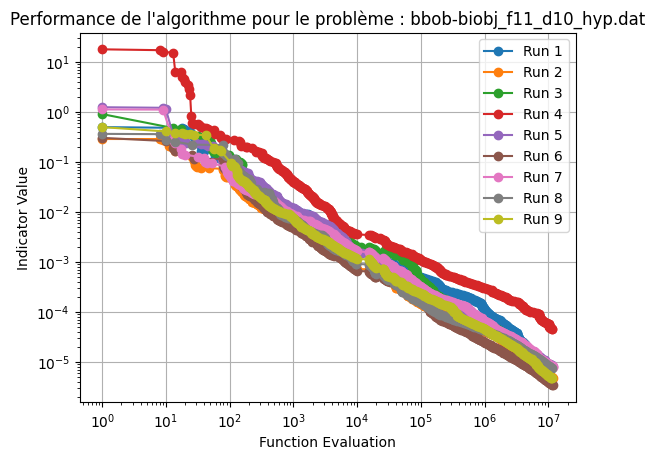

In [7]:
import numpy as np
import os

# Répertoire contenant les fichiers .dat pour chaque problème
directory = 'd02_d03_d10/1-separable_1-separable/'

# Initialisation des listes pour stocker les résultats pour chaque problème
all_problems_data = []

# Parcourir tous les fichiers dans le répertoire
for filename in os.listdir(directory):
    if filename.endswith('.dat'):
        filepath = os.path.join(directory, filename)
        
        # Initialisation des listes pour stocker les données de chaque run/instance pour un problème
        function_evaluation = []
        indicator_value = []
        
        # Lire les données brutes à partir du fichier .dat
        with open(filepath, 'r') as file:
            lines = file.readlines()

        inst_run_fct = []
        inst_run_valu = []
        
        # Analyse des données pour chaque run/instance
        for line in lines:
            if line.startswith('%') or line.strip() == '':
                if inst_run_fct:
                    function_evaluation.append(inst_run_fct)
                    indicator_value.append(inst_run_valu)
                inst_run_fct = []
                inst_run_valu = []
                continue
            else:
                data = line.split()
                inst_run_fct.append(float(data[0]))
                inst_run_valu.append(float(data[1]))

        # Stocker les résultats pour ce problème
        problem_data = {
            'filename': filename,
            'function_evaluation': function_evaluation,
            'indicator_value': indicator_value
        }
        all_problems_data.append(problem_data)

# Analyse et visualisation des données pour chaque problème
for problem_data in all_problems_data:
    filename = problem_data['filename']
    function_evaluation = problem_data['function_evaluation']
    indicator_value = problem_data['indicator_value']
    
    # Calcul des statistiques pour chaque run/instance
    for i in range(len(function_evaluation)):
        fe = np.array(function_evaluation[i])
        iv = np.array(indicator_value[i])
        mean_fe = np.mean(fe)
        mean_iv = np.mean(iv)
        median_fe = np.median(fe)
        median_iv = np.median(iv)
        var_fe = np.var(fe)
        var_iv = np.var(iv)
        


    # Visualisation des données pour chaque problème
    fig, ax = plt.subplots()
    for i in range(len(function_evaluation)):
        ax.plot(function_evaluation[i], indicator_value[i], marker='o', linestyle='-', label=f'Run {i+1}')

    ax.set_xlabel('Function Evaluation')
    ax.set_ylabel('Indicator Value')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_title(f'Performance de l\'algorithme pour le problème : {filename}')
    ax.grid(True)
    ax.legend()
    plt.show()
